In [1]:
#Import needed libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import data

ratings = pd.read_csv('/Users/reffer/Desktop/imdb.title.ratings.csv')
title = pd.read_csv('/Users/reffer/Desktop/imdb.title.basics.csv')
gross = pd.read_csv('/Users/reffer/Desktop/bom.movie_gross.csv')
principals = pd.read_csv('/Users/reffer/Desktop/imdb.title.principals.csv')
name = pd.read_csv('/Users/reffer/Desktop/imdb.name.basics.csv')
budget = pd.read_csv('/Users/reffer/Desktop/tn.movie_budgets.csv')

In [3]:
#show ratings dataframe

ratings.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
#show title dataframe

title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
#show gross dataframe

gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
#show principals dataframe

principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [7]:
#show name dataframe

name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [8]:
#Join ratings and title

movies=ratings.join(title.set_index('tconst'), on='tconst')
movies.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [9]:
# check nulls rows

movies.isnull().sum()

tconst                0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

In [10]:
# Drop null rows

movies.dropna(inplace=True)
movies.info()
movies

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65720 non-null  object 
 1   averagerating    65720 non-null  float64
 2   numvotes         65720 non-null  int64  
 3   primary_title    65720 non-null  object 
 4   original_title   65720 non-null  object 
 5   start_year       65720 non-null  int64  
 6   runtime_minutes  65720 non-null  float64
 7   genres           65720 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73849,tt9768966,8.6,27,Plugged in,Plugged in,2019,53.0,Documentary
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [11]:
#Rename title column

movies=movies.rename(columns={'primary_title':'title'})
movies.head()

,tconst,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [12]:
# Join movies with gross

movies = movies.join(gross.set_index('title'), on='title') 
movies.info()
movies.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 65722 entries, 0 to 73855
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65722 non-null  object 
 1   averagerating    65722 non-null  float64
 2   numvotes         65722 non-null  int64  
 3   title            65722 non-null  object 
 4   original_title   65722 non-null  object 
 5   start_year       65722 non-null  int64  
 6   runtime_minutes  65722 non-null  float64
 7   genres           65722 non-null  object 
 8   studio           2972 non-null   object 
 9   domestic_gross   2953 non-null   float64
 10  foreign_gross    1789 non-null   object 
 11  year             2975 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 6.5+ MB


,tconst,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,NaN,NaN,NaN,NaN
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,NaN,NaN,NaN,NaN
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,NaN,NaN,NaN,NaN
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014.0
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",NaN,NaN,NaN,NaN


In [13]:
# prepare budget for join

budget= budget.rename(columns={'movie':'title'})
budget['domestic_gross'] = budget['domestic_gross'].apply(lambda a: str(a).replace('$', '').replace(',','')).astype(float)
budget['production_budget'] = budget['production_budget'].apply(lambda a: str(a).replace('$', '').replace(',','')).astype(float)
budget['worldwide_gross'] = budget['worldwide_gross'].apply(lambda a: str(a).replace('$', '').replace(',','')).astype(float)
#divide by million 
budget['domestic_gross'] = budget['domestic_gross']/1000000
budget['production_budget']= budget['production_budget']/1000000
budget['worldwide_gross'] = budget['worldwide_gross']/1000000
budget.info()
budget.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   title              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875
2,3,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.005868,1403.013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747


In [14]:
# Join movies with budget

movies =budget.merge(movies, on='title', how='left')
movies .head()

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,tconst,averagerating,numvotes,original_title,start_year,runtime_minutes,genres,studio,domestic_gross_y,foreign_gross,year
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,tt1775309,6.1,43.0,Abatâ,2011.0,93.0,Horror,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,tt1298650,6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",BV,241100000.0,804600000,2011.0
2,3,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350,tt6565702,6.0,24451.0,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.005868,1403.013963,tt2395427,7.3,665594.0,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",BV,459000000.0,946400000,2015.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Clean data 

um = movies # ultimate movies

um.dropna(inplace=True) # remove null rows

#convert object to float
um['foreign_gross'] = um['foreign_gross'].apply(lambda a: str(a).replace(',','')).astype(float)

#calculate domestic gross mean
um['domestic_gross'] = (um['domestic_gross_x'] + um['domestic_gross_y']) / 2   # TODO find a better solution. THIS IS VERY GROSS

#drop unwanted column 
um = um.drop(['id','release_date','title','tconst','original_title','start_year','studio','domestic_gross_x','domestic_gross_y','year'], axis=1)

#divide by milion
um['domestic_gross'] = um['domestic_gross']/1000000
um['foreign_gross'] = um['foreign_gross']/1000000

um.info()
um.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 1 to 6275
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   production_budget  1181 non-null   float64
 1   worldwide_gross    1181 non-null   float64
 2   averagerating      1181 non-null   float64
 3   numvotes           1181 non-null   float64
 4   runtime_minutes    1181 non-null   float64
 5   genres             1181 non-null   object 
 6   foreign_gross      1181 non-null   float64
 7   domestic_gross     1181 non-null   float64
dtypes: float64(7), object(1)
memory usage: 83.0+ KB


,production_budget,worldwide_gross,averagerating,numvotes,runtime_minutes,genres,foreign_gross,domestic_gross
1,410.6,1045.663875,6.6,447624.0,136.0,"Action,Adventure,Fantasy",804.60000,120.550121
3,330.6,1403.013963,7.3,665594.0,141.0,"Action,Adventure,Sci-Fi",946.40000,229.500230
6,300.0,2048.134200,8.5,670926.0,149.0,"Action,Adventure,Sci-Fi",0.00137,339.400339
8,300.0,655.945209,6.5,329135.0,120.0,"Action,Adventure,Fantasy",428.90000,114.500115
9,300.0,879.620923,6.8,352504.0,148.0,"Action,Adventure,Thriller",680.60000,100.050100


In [16]:
#sort value um by worldwide_gross

um=um.sort_values(by='worldwide_gross' ,ascending=False)
um

,production_budget,worldwide_gross,averagerating,numvotes,runtime_minutes,genres,foreign_gross,domestic_gross
6,300.00,2048.134200,8.5,670926.0,149.0,"Action,Adventure,Sci-Fi",0.001370,339.400339
33,215.00,1648.854864,7.0,539338.0,124.0,"Action,Adventure,Sci-Fi",0.001019,326.150326
69,190.00,1518.722794,7.2,335074.0,137.0,"Action,Crime,Thriller",0.001163,176.500177
3,330.60,1403.013963,7.3,665594.0,141.0,"Action,Adventure,Sci-Fi",946.400000,229.500230
43,200.00,1348.258224,7.3,516148.0,134.0,"Action,Adventure,Sci-Fi",646.900000,350.050350
...,...,...,...,...,...,...,...,...
6096,0.40,0.044452,6.6,2941.0,86.0,"Action,Comedy,Crime",1.100000,0.000400
5880,0.95,0.000000,6.9,104951.0,101.0,"Crime,Drama,Mystery",21.900000,1.150000
5265,3.00,0.000000,6.8,12706.0,81.0,"Action,Crime,Drama",8.500000,0.354000
5879,0.95,0.000000,4.6,77.0,83.0,Horror,21.900000,1.150000


In [17]:
# Reduce genres to a more meaninful amount

dummies = um['genres'].str.split(',') #splits the genre on the comma and returns a list
dummies = dummies.str[0] #select only the first element on the list
um= um.drop(['genres'], axis=1)
um['genres'] = dummies
um.info()
um.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 6 to 5266
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   production_budget  1181 non-null   float64
 1   worldwide_gross    1181 non-null   float64
 2   averagerating      1181 non-null   float64
 3   numvotes           1181 non-null   float64
 4   runtime_minutes    1181 non-null   float64
 5   foreign_gross      1181 non-null   float64
 6   domestic_gross     1181 non-null   float64
 7   genres             1181 non-null   object 
dtypes: float64(7), object(1)
memory usage: 83.0+ KB


,production_budget,worldwide_gross,averagerating,numvotes,runtime_minutes,foreign_gross,domestic_gross,genres
6,300.0,2048.134200,8.5,670926.0,149.0,0.001370,339.400339,Action
33,215.0,1648.854864,7.0,539338.0,124.0,0.001019,326.150326,Action
69,190.0,1518.722794,7.2,335074.0,137.0,0.001163,176.500177,Action
3,330.6,1403.013963,7.3,665594.0,141.0,946.400000,229.500230,Action
43,200.0,1348.258224,7.3,516148.0,134.0,646.900000,350.050350,Action


In [18]:
# Group the rows by genre
count = um.groupby(['genres'])['genres'].count()
filt_count = count.loc[count > 50]
g = filt_count.index.values
filt_um = um.loc[um['genres'].isin(g)]
ugm=filt_um.groupby(['genres']).mean() #ultimate grouped movies
#um=um.first()  Select initial periods of time series data based

ugm.info()
ugm


<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Action to Horror
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   production_budget  7 non-null      float64
 1   worldwide_gross    7 non-null      float64
 2   averagerating      7 non-null      float64
 3   numvotes           7 non-null      float64
 4   runtime_minutes    7 non-null      float64
 5   foreign_gross      7 non-null      float64
 6   domestic_gross     7 non-null      float64
dtypes: float64(7)
memory usage: 448.0+ bytes


,production_budget,worldwide_gross,averagerating,numvotes,runtime_minutes,foreign_gross,domestic_gross
genres,,,,,,,
Action,87.625352,272.118800,6.421972,200479.822535,114.208451,163.670551,49.869619
Adventure,85.931579,308.776282,6.510526,144293.022556,103.398496,200.074246,54.459549
Biography,28.440698,105.403347,7.127907,132940.558140,118.069767,56.400910,24.991886
Comedy,27.469340,90.073876,6.181604,86917.806604,104.339623,40.508947,24.265191
Crime,26.911194,69.039965,6.592537,106880.014925,112.343284,34.620964,15.493284
Drama,25.756680,83.411453,6.649510,92253.558824,107.980392,46.024555,18.838492
Horror,17.481538,116.176161,5.473846,79745.246154,93.369231,64.416615,26.092565


In [19]:
#divide numvotes by 100

ugm['numvotes'] = ugm['numvotes']/100

ugm 

,production_budget,worldwide_gross,averagerating,numvotes,runtime_minutes,foreign_gross,domestic_gross
genres,,,,,,,
Action,87.625352,272.118800,6.421972,2004.798225,114.208451,163.670551,49.869619
Adventure,85.931579,308.776282,6.510526,1442.930226,103.398496,200.074246,54.459549
Biography,28.440698,105.403347,7.127907,1329.405581,118.069767,56.400910,24.991886
Comedy,27.469340,90.073876,6.181604,869.178066,104.339623,40.508947,24.265191
Crime,26.911194,69.039965,6.592537,1068.800149,112.343284,34.620964,15.493284
Drama,25.756680,83.411453,6.649510,922.535588,107.980392,46.024555,18.838492
Horror,17.481538,116.176161,5.473846,797.452462,93.369231,64.416615,26.092565


In [20]:
# add a column

ugm ['profits']= ugm ['worldwide_gross'] - ugm['production_budget']
ugm

,production_budget,worldwide_gross,averagerating,numvotes,runtime_minutes,foreign_gross,domestic_gross,profits
genres,,,,,,,,
Action,87.625352,272.118800,6.421972,2004.798225,114.208451,163.670551,49.869619,184.493448
Adventure,85.931579,308.776282,6.510526,1442.930226,103.398496,200.074246,54.459549,222.844703
Biography,28.440698,105.403347,7.127907,1329.405581,118.069767,56.400910,24.991886,76.962650
Comedy,27.469340,90.073876,6.181604,869.178066,104.339623,40.508947,24.265191,62.604537
Crime,26.911194,69.039965,6.592537,1068.800149,112.343284,34.620964,15.493284,42.128771
Drama,25.756680,83.411453,6.649510,922.535588,107.980392,46.024555,18.838492,57.654774
Horror,17.481538,116.176161,5.473846,797.452462,93.369231,64.416615,26.092565,98.694623


In [21]:
#sort value ugm by worldwide_gross

ugm_W=ugm.sort_values(by='worldwide_gross' ,ascending=False)
ugm_W

,production_budget,worldwide_gross,averagerating,numvotes,runtime_minutes,foreign_gross,domestic_gross,profits
genres,,,,,,,,
Adventure,85.931579,308.776282,6.510526,1442.930226,103.398496,200.074246,54.459549,222.844703
Action,87.625352,272.118800,6.421972,2004.798225,114.208451,163.670551,49.869619,184.493448
Horror,17.481538,116.176161,5.473846,797.452462,93.369231,64.416615,26.092565,98.694623
Biography,28.440698,105.403347,7.127907,1329.405581,118.069767,56.400910,24.991886,76.962650
Comedy,27.469340,90.073876,6.181604,869.178066,104.339623,40.508947,24.265191,62.604537
Drama,25.756680,83.411453,6.649510,922.535588,107.980392,46.024555,18.838492,57.654774
Crime,26.911194,69.039965,6.592537,1068.800149,112.343284,34.620964,15.493284,42.128771


In [22]:
#sort value ugm by profits

ugm_P=ugm.sort_values(by='profits' ,ascending=False)
ugm_P

,production_budget,worldwide_gross,averagerating,numvotes,runtime_minutes,foreign_gross,domestic_gross,profits
genres,,,,,,,,
Adventure,85.931579,308.776282,6.510526,1442.930226,103.398496,200.074246,54.459549,222.844703
Action,87.625352,272.118800,6.421972,2004.798225,114.208451,163.670551,49.869619,184.493448
Horror,17.481538,116.176161,5.473846,797.452462,93.369231,64.416615,26.092565,98.694623
Biography,28.440698,105.403347,7.127907,1329.405581,118.069767,56.400910,24.991886,76.962650
Comedy,27.469340,90.073876,6.181604,869.178066,104.339623,40.508947,24.265191,62.604537
Drama,25.756680,83.411453,6.649510,922.535588,107.980392,46.024555,18.838492,57.654774
Crime,26.911194,69.039965,6.592537,1068.800149,112.343284,34.620964,15.493284,42.128771


In [23]:
#reset index

ugm_P.reset_index (inplace=True)


In [24]:
ugm_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genres             7 non-null      object 
 1   production_budget  7 non-null      float64
 2   worldwide_gross    7 non-null      float64
 3   averagerating      7 non-null      float64
 4   numvotes           7 non-null      float64
 5   runtime_minutes    7 non-null      float64
 6   foreign_gross      7 non-null      float64
 7   domestic_gross     7 non-null      float64
 8   profits            7 non-null      float64
dtypes: float64(8), object(1)
memory usage: 632.0+ bytes


<AxesSubplot:ylabel='genres'>

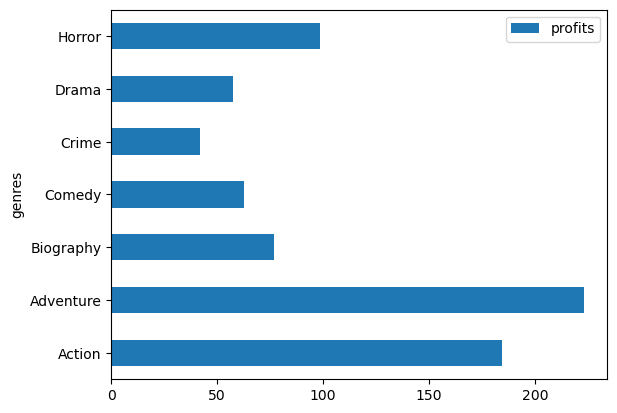

In [25]:
#Relationship between genres and profits.

table2 = pd.pivot_table(ugm,index='genres',values=['profits'])
table2.plot.barh()


<AxesSubplot:ylabel='genres'>

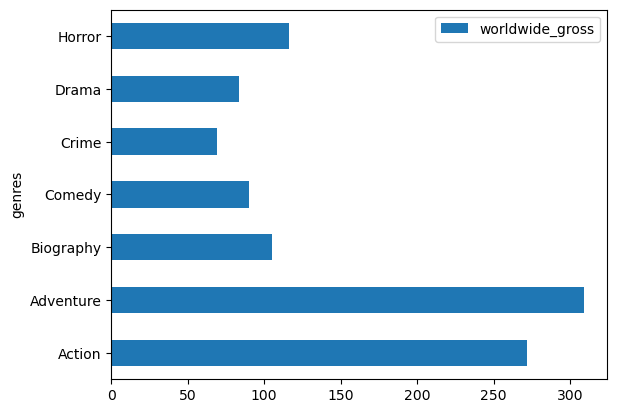

In [26]:
#Relationship between genres and worlwide_gross.

table2 = pd.pivot_table(ugm,index='genres',values=['worldwide_gross'])
table2.plot.barh()

<AxesSubplot:title={'center':'Number of votes'}, ylabel='numvotes'>

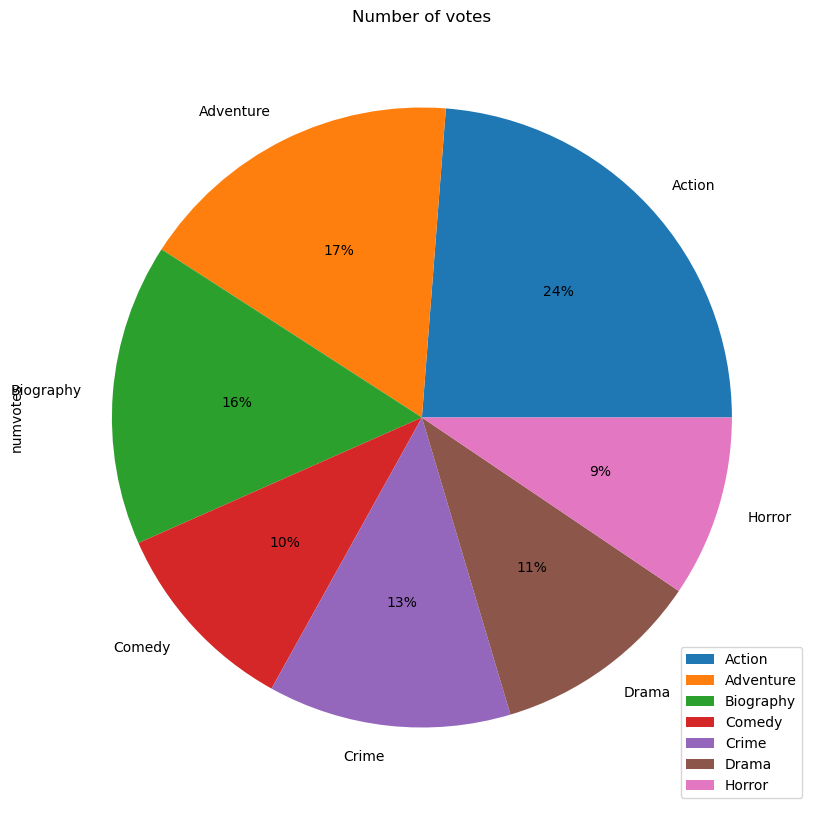

In [27]:
#genres with the most numvotes.

ugm.groupby(['genres']).sum().plot(kind='pie', y='numvotes', autopct='%1.0f%%',
                                title='Number of votes',figsize=(10,15))




<AxesSubplot:title={'center':'Average Genres Rating'}, ylabel='averagerating'>

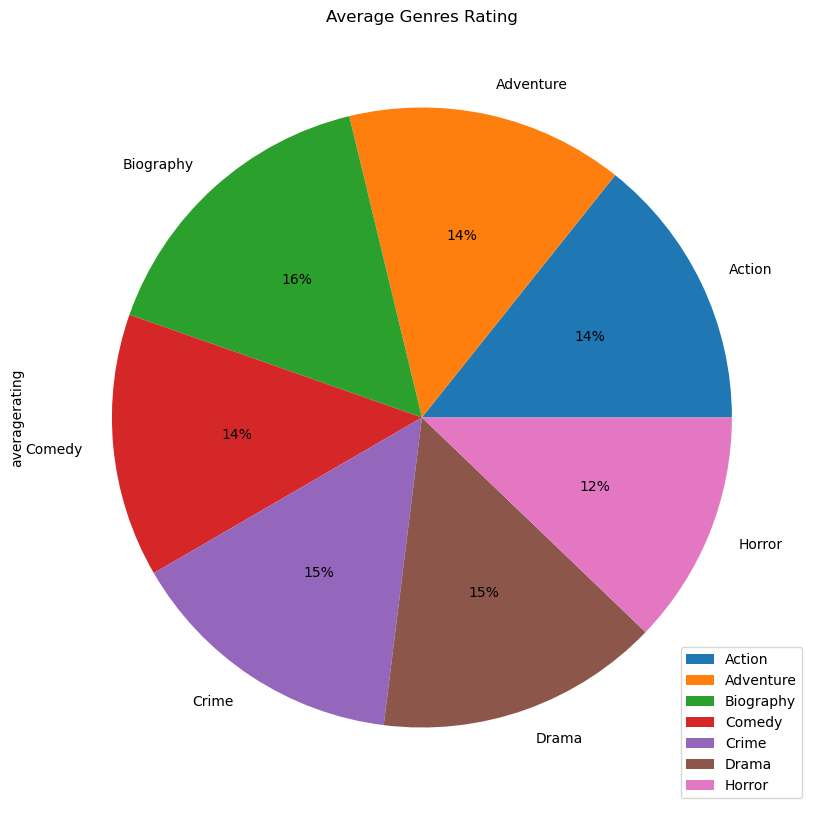

In [28]:
#pie chart showing with genre got highest score.

ugm.groupby(['genres']).sum().plot(kind='pie', y='averagerating', autopct='%1.0f%%',
                                title='Average Genres Rating',figsize=(10,15))


In [29]:
#pie chart showing genres between 2009 and 2022 that had an average rating above eight and domestic gross results at 95th percentile

test2=movies[((movies['year'] >= 2009) & (movies['year'] <= 2022))
      & (movies['averagerating'] > 8.0)
      & (movies['domestic_gross'] > movies['domestic_gross'].quantile(0.95))]
test2

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,tconst,averagerating,numvotes,original_title,start_year,runtime_minutes,genres,studio,domestic_gross_y,foreign_gross,year,domestic_gross
6,7,"Apr 27, 2018",Avengers: Infinity War,300.0,678.815482,2048.134200,tt4154756,8.5,670926.0,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",BV,678800000.0,1369.5,2018.0,3.394003e+08
10,11,"Jul 20, 2012",The Dark Knight Rises,275.0,448.139099,1084.439099,tt1345836,8.4,1387769.0,The Dark Knight Rises,2012.0,164.0,"Action,Thriller",WB,448100000.0,636800000.0,2012.0,2.240502e+08
48,47,"Jun 18, 2010",Toy Story 3,200.0,415.004880,1068.879522,tt0435761,8.3,682218.0,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",BV,415000000.0,652000000.0,2010.0,2.075002e+08
102,98,"Jun 19, 2015",Inside Out,175.0,356.461711,854.235992,tt2096673,8.2,536181.0,Inside Out,2015.0,95.0,"Adventure,Animation,Comedy",BV,356500000.0,501100000.0,2015.0,1.782502e+08
122,14,"Aug 1, 2014",Guardians of the Galaxy,170.0,333.172112,770.867516,tt2015381,8.1,948394.0,Guardians of the Galaxy,2014.0,121.0,"Action,Adventure,Comedy",BV,333200000.0,440200000.0,2014.0,1.666002e+08
148,38,"Jul 16, 2010",Inception,160.0,292.576195,835.524642,tt1375666,8.8,1841066.0,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",WB,292600000.0,535700000.0,2010.0,1.463001e+08


<AxesSubplot:title={'center':'Domestic gross'}, ylabel='domestic_gross'>

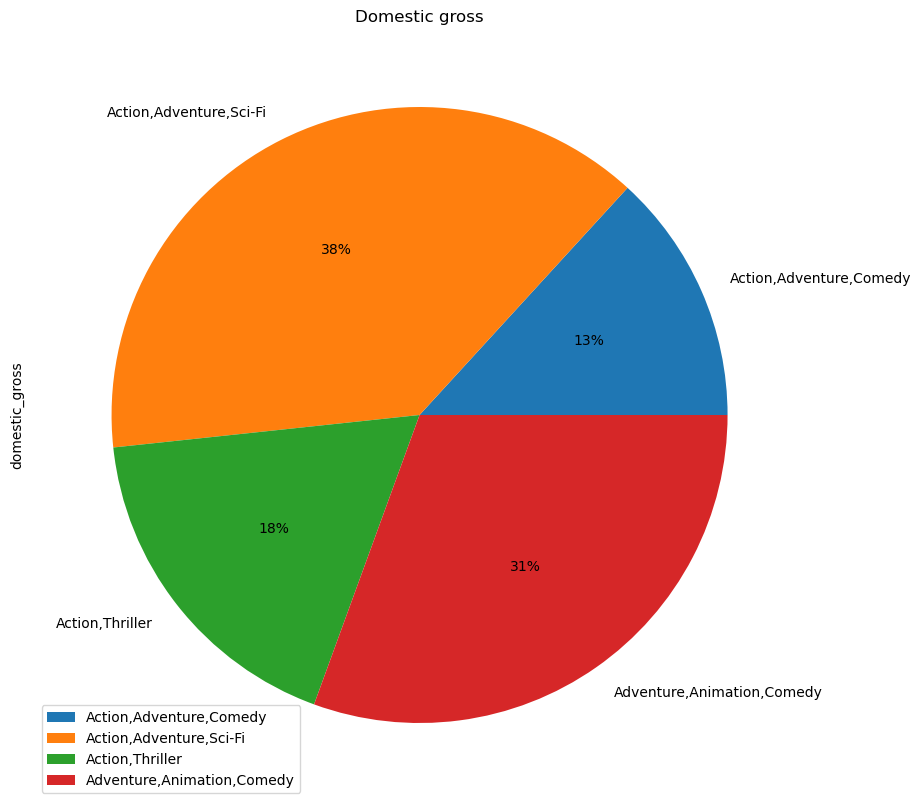

In [30]:
test2.groupby(['genres']).sum().plot(kind='pie', y='domestic_gross', autopct='%1.0f%%',
                                title='Domestic gross',figsize=(10,10))

In [31]:
# Showing genres, runtime_minutes, profits columns

ugm_Px=ugm_P[['genres','runtime_minutes','profits']]
ugm_Px

,genres,runtime_minutes,profits
0,Adventure,103.398496,222.844703
1,Action,114.208451,184.493448
2,Horror,93.369231,98.694623
3,Biography,118.069767,76.962650
4,Comedy,104.339623,62.604537
5,Drama,107.980392,57.654774
6,Crime,112.343284,42.128771


<AxesSubplot:xlabel='runtime_minutes', ylabel='profits'>

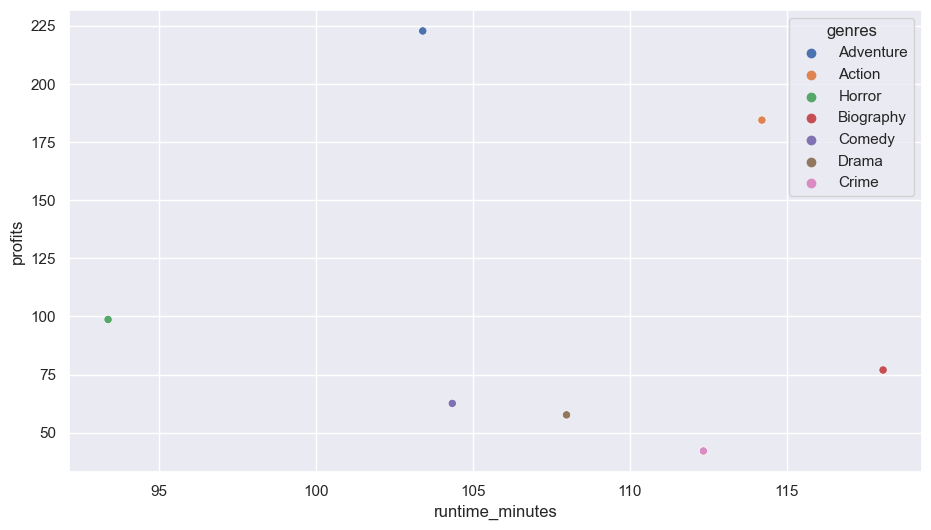

In [32]:
import seaborn as sns
#table = pd.pivot_table(ugm_Px,index='profits',values=['genres'])
#table.plot.barh()
#ugm_Px.plot.scatter('runtime_minutes','profits',c=genres)

sns.set(rc={'figure.figsize':(11,6)})
sns.scatterplot(x='runtime_minutes', y='profits', data=ugm_Px, hue='genres',sizes=(20,200))


<AxesSubplot:xlabel='runtime_minutes', ylabel='worldwide_gross'>

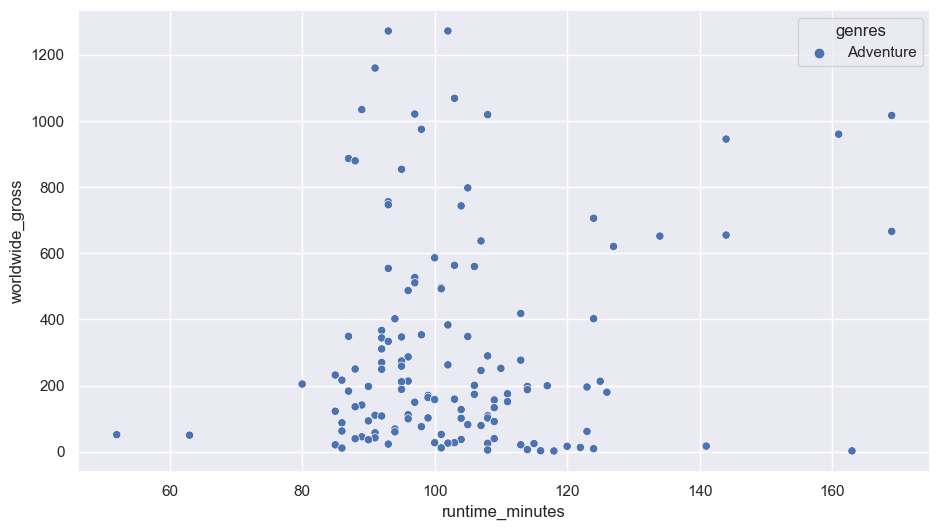

In [33]:
scatdf=um
scatdata = scatdf.loc[scatdf['genres'] == 'Adventure']
#sns.set(rc={'figure.figsize':(11,6)})
sns.scatterplot(x='runtime_minutes', y='worldwide_gross', data=scatdata, hue='genres',sizes=(20,200))
#scatdata.info()


<AxesSubplot:xlabel='runtime_minutes', ylabel='worldwide_gross'>

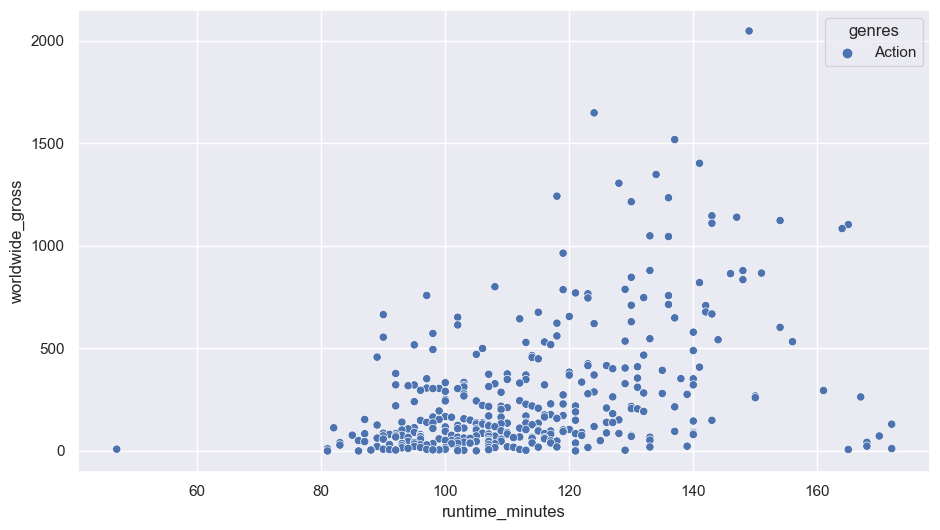

In [34]:
scatdf=um
scatdata = scatdf.loc[scatdf['genres'] == 'Action']
#sns.set(rc={'figure.figsize':(11,6)})
sns.scatterplot(x='runtime_minutes', y='worldwide_gross', data=scatdata, hue='genres',sizes=(20,200))
#scatdata.info()